# Hamming weight and Pearson Correlation

This notebook demonstrates how to guess a floating number using Hamming Weight model.

We generate a random secret floating number. Then we use hamming weight model to guess the number.

In [1]:
import pathlib
TEST_RESULT_DIR = './results'

pathlib.Path(TEST_RESULT_DIR).mkdir(parents=True, exist_ok=True) 

In [2]:
import numpy as np

mantissa_nbits = 12
guess_range=(-5.0, 5.0)
# the number of guess values in the guess range
secret_number = np.random.uniform(guess_range[0], guess_range[1]) 
secret_number = -0.5310286918987197
print('secret_number =', secret_number)

secret_number = -0.5310286918987197


## Receover the weight number in step-by-step

In [3]:
import sys
sys.path.append("../")

from pybatina.weight_recovery import *
from pybatina.utils import *

### Correlation of mantissa

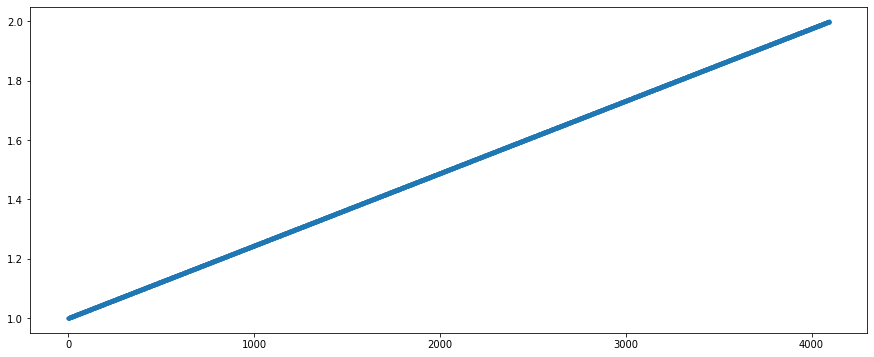

In [4]:
guess_numbers = build_guess_values(component='mantissa', mantissa_nbits=mantissa_nbits, guess_range=guess_range)
known_inputs = build_input_values(mantissa_nbits=mantissa_nbits, component='mantissa')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
pd.Series(known_inputs).sort_values().reset_index(drop=True).plot(figsize=(15,6), marker='.')

In [5]:
%%time
mantisa_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

CPU times: user 11.6 s, sys: 310 ms, total: 11.9 s
Wall time: 11.9 s


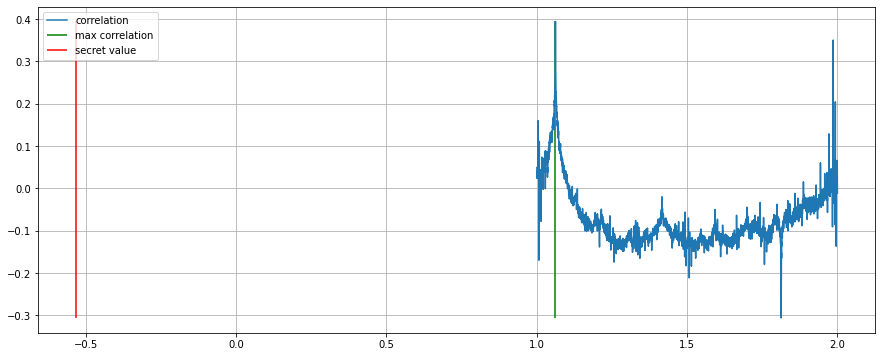

In [6]:
ax = mantisa_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(mantisa_corr.idxmax(), mantisa_corr.min(), mantisa_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, mantisa_corr.min(), mantisa_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [7]:
mantisa_corr.sort_values(ascending=False).iloc[:10]

1.062012    0.394392
1.985840    0.350450
1.062256    0.334532
1.062500    0.333254
1.061768    0.323963
1.061523    0.301115
1.062744    0.286466
1.061279    0.273648
1.061035    0.267618
1.062988    0.265013
dtype: float64

### Correlation exponent

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
../pybatina/weight_recovery.py:40: RuntimeWarning: invalid value encountered in greater_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
../pybatina/weight_recovery.py:40: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]


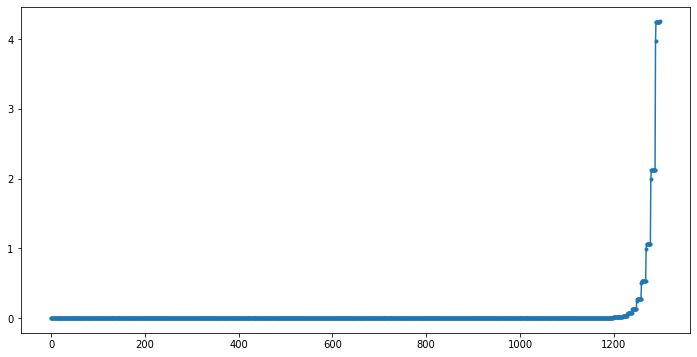

In [8]:
known_inputs = build_input_values(component='exponent')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
guess_numbers = build_guess_values(component='exponent', numbers=mantisa_corr.sort_values(ascending=False).index[:10], guess_range=guess_range)
pd.Series(guess_numbers).sort_values().reset_index(drop=True).plot(figsize=(12,6), marker='.')

In [9]:
%%time
mantisa_exp_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


CPU times: user 413 ms, sys: 3.89 ms, total: 417 ms
Wall time: 415 ms


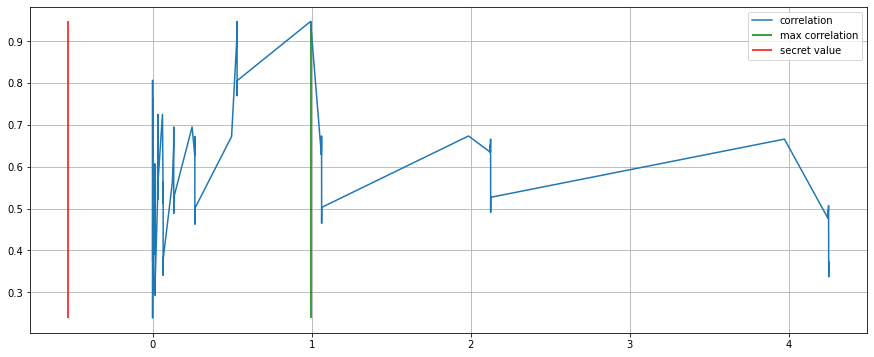

In [10]:
ax = mantisa_exp_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(mantisa_exp_corr.idxmax(), mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [11]:
mantisa_exp_corr.sort_values(ascending=False).iloc[:10]

0.531128    0.946661
0.992920    0.946661
0.530640    0.931935
0.531006    0.931935
0.530884    0.931935
0.530518    0.913912
0.530762    0.913912
0.000015    0.806229
0.531494    0.805371
0.531372    0.805371
dtype: float64

### Correlation sign

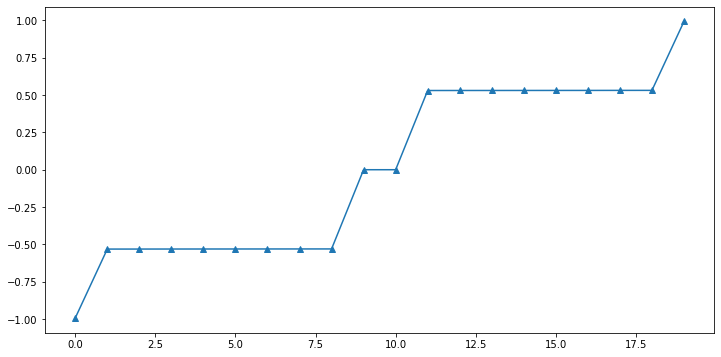

In [12]:
guess_numbers = build_guess_values(component='sign', numbers=mantisa_exp_corr.sort_values(ascending=False).index[:10], guess_range=guess_range)
known_inputs = build_input_values(component='sign')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
pd.Series(guess_numbers).sort_values().reset_index(drop=True).plot(figsize=(12,6), marker='^')

In [13]:
%%time
full_number_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

CPU times: user 14 ms, sys: 3.93 ms, total: 18 ms
Wall time: 17.9 ms


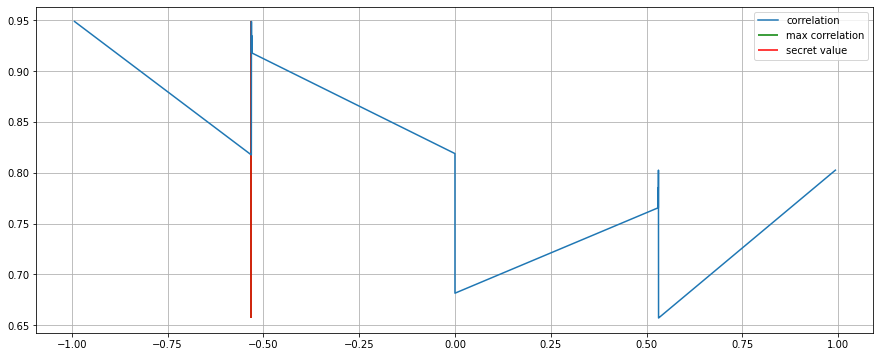

In [14]:
ax = full_number_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(full_number_corr.idxmax(), full_number_corr.min(), full_number_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, full_number_corr.min(), full_number_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [15]:
print('Secret value = %f' % secret_number)
full_number_corr.sort_values(ascending=False).iloc[:10]

Secret value = -0.531029


-0.992920    0.948737
-0.531128    0.948737
-0.530884    0.934803
-0.531006    0.934803
-0.530640    0.934803
-0.530762    0.917875
-0.530518    0.917875
-0.000015    0.818794
-0.531372    0.817507
-0.531494    0.817507
dtype: float64

## Recover a secret number with helper function

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
../pybatina/weight_recovery.py:40: RuntimeWarning: invalid value encountered in greater_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
../pybatina/weight_recovery.py:40: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


CPU times: user 11.7 s, sys: 280 ms, total: 12 s
Wall time: 12 s


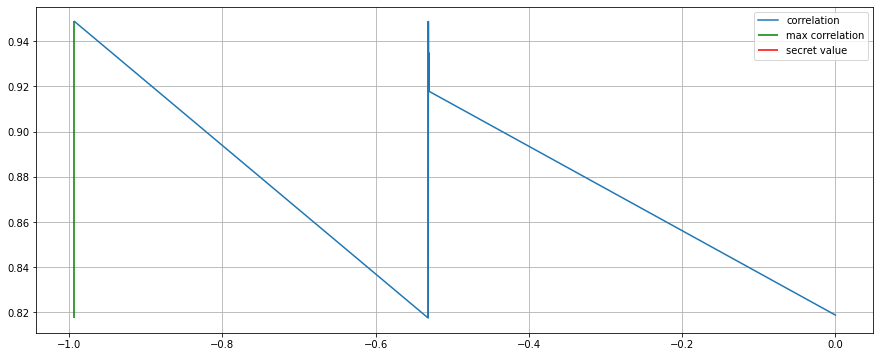

In [16]:
%%time
from weight_recovery_helper import *
full_number_corr = batina_recover_weight(secret_number=secret_number, 
                                         guess_range=guess_range,
                                         mantissa_nbits=mantissa_nbits,
                                         noise=None)
ax = full_number_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(full_number_corr.idxmax(), full_number_corr.min(), full_number_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, full_number_corr.min(), full_number_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [17]:
print('Secret value = %f' % secret_number)
full_number_corr.sort_values(ascending=False).iloc[:10]

Secret value = -0.531029


-0.531128    0.948737
-0.992920    0.948737
-0.530640    0.934803
-0.531006    0.934803
-0.530884    0.934803
-0.530518    0.917875
-0.530762    0.917875
-0.000015    0.818794
-0.531494    0.817507
-0.531372    0.817507
dtype: float64

## Recover multiple secret numbers

In [18]:
SECRET_VALUE='secret value'
GUESSED_VALUE = 'guessed value'
CORRELATION='correlation'
df_index = [SECRET_VALUE, GUESSED_VALUE, CORRELATION]

In [19]:
def add_noise_to_signal(signal, snr, freq):
    """
    add noise to the signal
    :param signal: signal
    :param snr: signal to noise ratio 
    :param freq: frequency of noise 
    :return: signal with noise
    """
    sig_max = signal.max()
    sig_min = signal.min()
    return pd.Series(signal).apply(lambda x: x  +
                                   np.average(np.random.normal(0.0, (sig_max-sig_min)/snr, freq)))

In [20]:
precision = 1e-3
n_secret_numbers = 200
secret_numbers = np.concatenate((
    np.random.uniform(guess_range[0], guess_range[1], int(n_secret_numbers*2/4) ),
    np.random.uniform(guess_range[0]*3e-1, guess_range[1]*3e-1, int(n_secret_numbers*1/4)),
    np.random.uniform(guess_range[0]*1e-1, guess_range[1]*1e-1, int(n_secret_numbers*1/4))
))
np.random.shuffle(secret_numbers)
signal_to_noise_ratio = 0.5
print('secret_numbers.shape = %s' % (str(secret_numbers.shape)))

secret_numbers.shape = (200,)


## Batina

In [21]:
%%time
# start guessing... - without noise
batina_results = pd.DataFrame(dtype=np.float32, columns=df_index)
for value in secret_numbers:
    s = batina_recover_weight(secret_number=value,
                              guess_range=guess_range,
                              mantissa_nbits=mantissa_nbits)
    s.name = CORRELATION
    df = pd.DataFrame(s).reset_index().rename(columns={'index': GUESSED_VALUE})
    df[SECRET_VALUE] = value
    batina_results = pd.concat([batina_results, df], axis=0, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)
../pybatina/weight_recovery.py:40: RuntimeWarning: invalid value encountered in greater_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
../pybatina/weight_recovery.py:40: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
../pybatina/weight_recovery.py:88: RuntimeWarning: invalid value encountered in multiply
  data=np.vectorize(hamming_weight)(known_inputs.reshape(-1, 1) * guess_numbers))


CPU times: user 38min 28s, sys: 58.2 s, total: 39min 26s
Wall time: 39min 26s


In [22]:
from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'batina_results-%s.csv' % (datetime.now().strftime("%Y%m%d_%H%M%S")))
batina_results.to_csv(fname)
print('save results in %s' % fname)

save results in ./results/batina_results-20200610_104141.csv


In [23]:
%%time
# start guessing... - without noise
noise_batina_results = pd.DataFrame(dtype=np.float32, columns=df_index)
for value in secret_numbers:
    s = batina_recover_weight(secret_number=value, 
                              guess_range=guess_range,
                              mantissa_nbits=mantissa_nbits,
                              noise=(add_noise_to_signal, signal_to_noise_ratio, 200))
    s.name = CORRELATION
    df = pd.DataFrame(s).reset_index().rename(columns={'index': GUESSED_VALUE})
    df[SECRET_VALUE] = value
    noise_batina_results = pd.concat([noise_batina_results, df], axis=0, ignore_index=True)

CPU times: user 41min 29s, sys: 1min 2s, total: 42min 32s
Wall time: 42min 36s


In [24]:
from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'noise_batina_results-%s.csv' % (datetime.now().strftime("%Y%m%d_%H%M%S")))
noise_batina_results.to_csv(fname)
print('save results in %s' % fname)

save results in ./results/noise_batina_results-20200610_112418.csv


### Statistics

In [25]:
ERROR = 'error'
def statistics(df):
    dft = df[[SECRET_VALUE, GUESSED_VALUE, CORRELATION]].astype(dtype=np.float64)
    dft[ERROR] = np.abs((dft[GUESSED_VALUE] - dft[SECRET_VALUE])/dft[SECRET_VALUE])    
    best_corr = dft.loc[dft.groupby(SECRET_VALUE)[CORRELATION].idxmax()]
    best_err = dft.loc[dft.groupby(SECRET_VALUE)[ERROR].idxmin()]
    return best_corr.T, best_err.T

In [26]:
batina_best_corr, batina_best_err = statistics(batina_results)
noise_batina_best_corr, noise_batina_best_err = statistics(noise_batina_results)

In [27]:
study_score = batina_best_corr
(study_score.T[ERROR] < 1e-3).value_counts()

True     192
False      8
Name: error, dtype: int64

In [28]:
error_sorted = study_score.T.sort_values(ERROR, ascending=False)
error_sorted[:10]

,secret value,guessed value,correlation,error
580,-0.746674,-0.995605,0.996181,0.333387
820,2.993736,3.991699,0.985753,0.333351
90,2.782778,2.786621,0.998018,0.001381
1850,4.269687,4.264648,0.976461,0.001180
130,0.025045,0.025017,0.967813,0.001119
1330,-0.067233,-0.067307,0.986674,0.001092
1590,0.545362,0.544800,0.951329,0.001032
320,1.123619,1.124756,0.986287,0.001012
1130,0.132823,0.132690,0.997871,0.000999
1420,0.135576,0.135712,0.994930,0.000998


In [29]:
error_sorted.iloc[0][SECRET_VALUE]

-0.7466739217763015

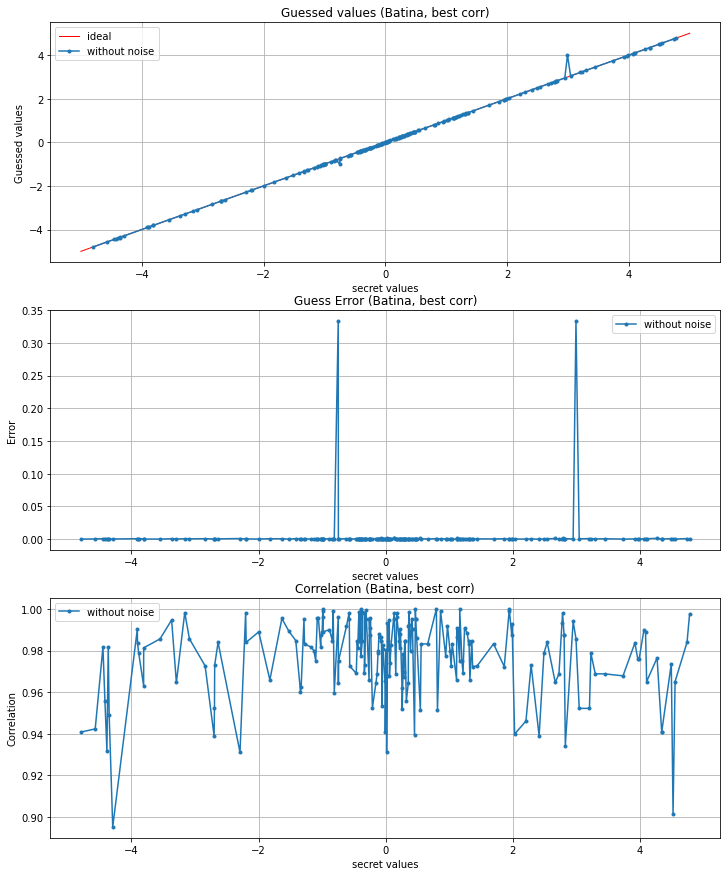

In [30]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
df = batina_best_corr.T
ax[0].plot(guess_range, guess_range, linewidth=1, label='ideal', color='red')
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (Batina, best corr)')

df = batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (Batina, best corr)')

df = batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (Batina, best corr)')

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')

from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'hw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f")))
plt.savefig(fname)
plt.show()

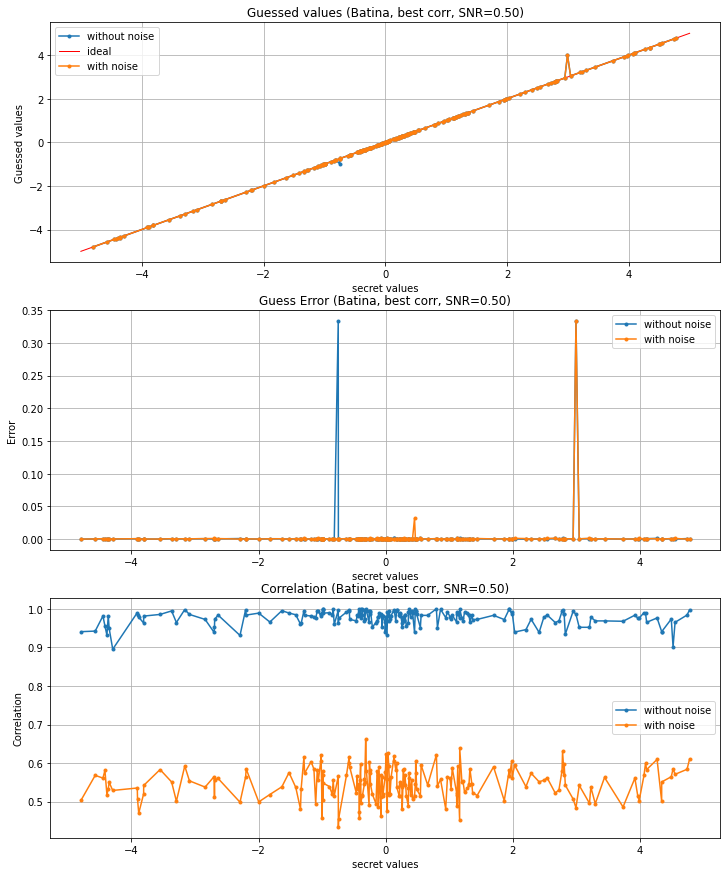

In [31]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
df = batina_best_corr.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
df = noise_batina_best_corr.T
ax[0].plot(guess_range, guess_range, linewidth=1, label='ideal', color='red')
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='with noise')
ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='with noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='with noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')

from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'nhw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f")))
plt.savefig(fname)
plt.show()